In [1]:
import pandas as pd
import numpy as np


In [2]:
path = r"D:\python projects\ML_HandsOn_PDF\handson-ml2\datasets\housing\housing.csv"
housing_data = pd.read_csv(path)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_data.info()
total_bedrooms = housing_data['total_bedrooms'].unique()
nan_bedrooms = housing_data.loc[housing_data['total_bedrooms'].isnull()]
total_bedrooms.sort()
print(total_bedrooms)
print(len(total_bedrooms))
print(len(nan_bedrooms))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
[1.000e+00 2.000e+00 3.000e+00 ... 6.210e+03 6.445e+03       nan]
1924
207


In [4]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


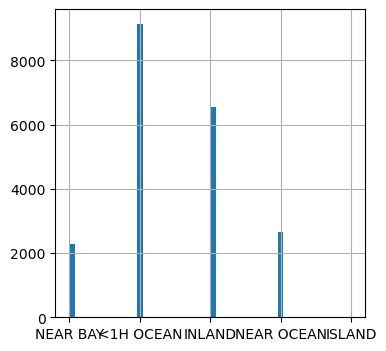

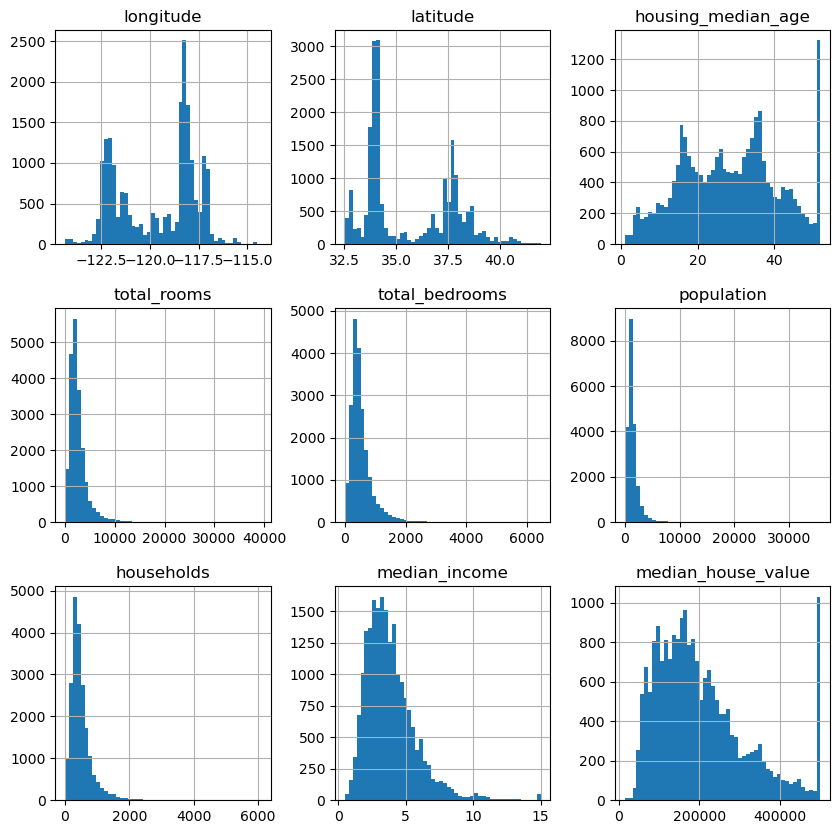

In [6]:
import matplotlib.pyplot as plt
housing_data['ocean_proximity'].hist(bins=50, figsize=(4,4))
plt.show()
housing_data.hist(bins=50, figsize=(10,10))
plt.show()

In [7]:
a = np.random.seed(1)
val = np.random.permutation(6)
print(val)

[2 1 4 0 3 5]


In [8]:
def split_train_test(data, test_ratio):
 np.random.seed(1)
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]


In [9]:
train_set, test_set = split_train_test(housing_data, 0.2)


In [10]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    # print( test_ratio * 2**32)
    # print(0xffffffff < test_ratio * 2**32)
    # print(crc32(np.int64(identifier)), identifier, crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32)
    # print(crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32)
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    print(len(data[in_test_set]), len(data[~in_test_set]))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
housing_with_id = housing_data.reset_index()
# print(housing_data.head())
# print(housing_with_id.head())
# print(housing_with_id.reset_index().head())

In [12]:

housing_with_id["id"] = housing_data["longitude"] * 1000 + housing_data["latitude"]
housing_with_id.head(3)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.5, "id")


10241 10399


In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
print(train_set.index, len(train_set))
print(test_set.index, len(test_set))

Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,  6061,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=16512) 16512
Index([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,  5723,
       ...
        4653,  1783,  7608,     0, 10155, 15362, 16623, 18086,  2144,  3665],
      dtype='int64', length=4128) 4128


15.0001
[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


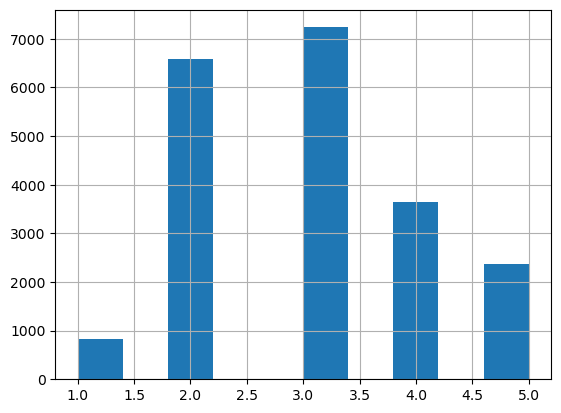

In [14]:
print(housing_data["median_income"].max())
housing_data["income_cat"] = pd.cut(housing_data["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
print(housing_data["income_cat"].unique())
housing_data['income_cat'].hist()
housing_data.info()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
print(split.split(housing_data, housing_data["income_cat"]))

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
#  train_index, test_index = split.split(housing_data, housing_data["income_cat"])
 print(len(train_index), len(test_index))
 print(test_index)
 strat_train_set = housing_data.loc[train_index]
 strat_test_set = housing_data.loc[test_index]

# print(strat_test_set[strat_test_set['income_cat'] == 2].count())
# print(housing_data[housing_data['income_cat'] == 2].count())
print(strat_test_set['income_cat'].info())

<generator object BaseShuffleSplit.split at 0x000002133D782740>
16512 4128
[ 5241 17352  3505 ... 17223 10786  3965]
<class 'pandas.core.series.Series'>
Index: 4128 entries, 5241 to 3965
Series name: income_cat
Non-Null Count  Dtype   
--------------  -----   
4128 non-null   category
dtypes: category(1)
memory usage: 36.5 KB
None


In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

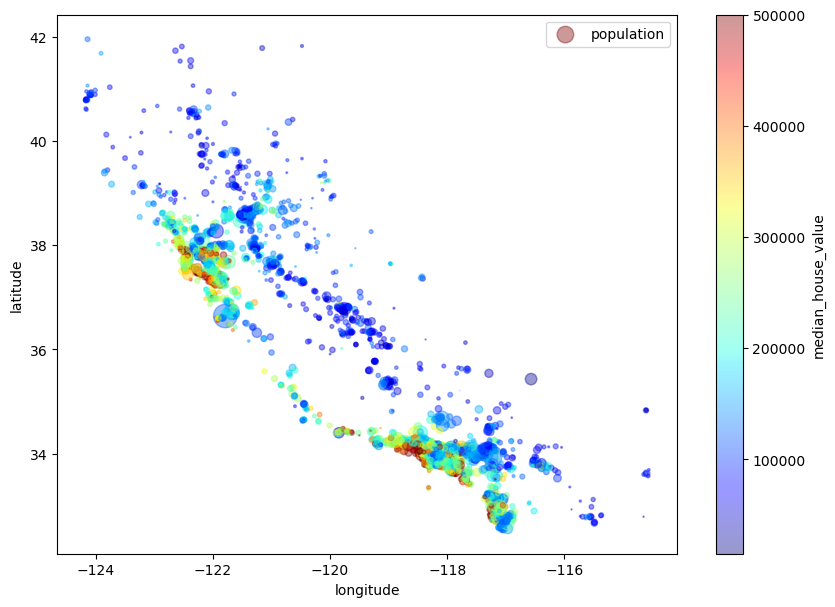

In [17]:
strat_test_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=strat_test_set["population"]/100, label="population", figsize=(10,7),
  c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
)
plt.legend()

In [18]:
res_test_df = strat_test_set.loc[:,strat_test_set.columns != 'ocean_proximity']

corr = res_test_df.corr()
corr['median_house_value'].sort_values(ascending=True)
# print(corr.head(5))


latitude             -0.150336
longitude            -0.039848
population           -0.016164
total_bedrooms        0.057247
households            0.070947
housing_median_age    0.071210
total_rooms           0.131296
income_cat            0.650579
median_income         0.691867
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

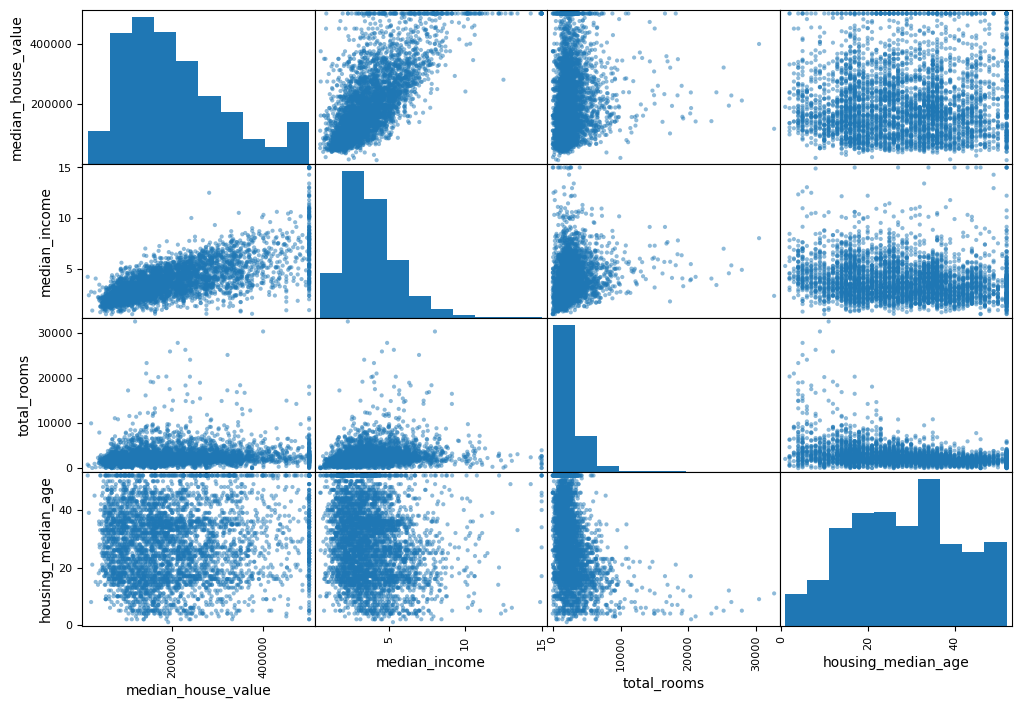

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(strat_test_set[attributes], figsize=(12, 8))

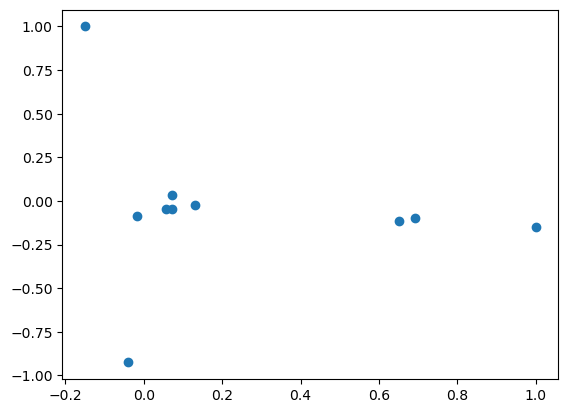

In [20]:
import matplotlib.pyplot as plt

plt.scatter(corr['median_house_value'], corr['latitude'])
plt.show()

In [21]:
housing_mod = strat_train_set.drop('median_house_value', axis=1)
print(len(strat_train_set.columns))
print(len(housing_mod.columns))
housing_labels = strat_train_set["median_house_value"].copy()
housing_labels.head(5)

11
10


12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [22]:
housing_new = housing_mod.dropna(subset='total_bedrooms')
housing_new.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# housing_mod.drop('ocean_proximity', inplace=True, axis=1)

housing_numerical_data = housing_mod.drop('ocean_proximity', axis=1)
imputer.fit(housing_numerical_data)
# shows median of each column and hence should contain only numerical values
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [24]:
X = imputer.transform(housing_numerical_data)
housing_modified_data = pd.DataFrame(X, columns=housing_numerical_data.columns)

housing_modified_data['ocean_proximity'] = housing_data['ocean_proximity']
housing_modified_data.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0,NEAR BAY
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0,NEAR BAY
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0,NEAR BAY
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0,NEAR BAY
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0,NEAR BAY


In [25]:
#fit and transform in 1 line
data = imputer.fit_transform(housing_numerical_data)
pd.DataFrame(data, columns = housing_numerical_data.columns).head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [26]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing_mod[['ocean_proximity']]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded_df = pd.DataFrame(housing_cat_encoded, columns=['ocean_proximity'])
housing_cat_encoded_df.head(5)

print(ordinal_encoder.categories_)


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [27]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
# Importantttttttttttt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")), 
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_numerical_data)
housing_num_tr_df = pd.DataFrame(housing_num_tr)
housing_num_tr_df.head(5)


,0,1,2,3,4,5,6,7,8
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432


In [29]:
# Importantttttttttttt
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_numerical_data)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing_mod)
housing_prepared_df = pd.DataFrame(housing_prepared)
housing_prepared_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,1.0,0.0,0.0,0.0,0.0


Linear Regressor

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [31]:
# Note to understand how linear Regression works here
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
print(X)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(y)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
print(reg.score(X,y))
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[ 6  8  9 11]
1.0


array([16.])

In [32]:
some_data = housing_data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# print(some_data)
# print(some_data_prepared)
print("Predictions:", lin_reg.predict(some_data_prepared))

print(list(some_labels))

Predictions: [407485.75654038 419455.10270223 383515.51652417 323821.44151381
 256284.8878959 ]
[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [33]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
# print(housing_predictions)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
print(lin_mse)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4742634145.222858


68866.78550087014

DecisionTree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
# print(list(housing_predictions))
# print(list(housing_labels))
# print(type(housing_labels))
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Doing Cross Validation for Decision Tree Regression Model

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(type(tree_rmse_scores))

<class 'numpy.ndarray'>


In [36]:
def display_scores(score: np.ndarray):
    print("scores: ", score)
    print("mean: ", score.mean())
    print("Standard deviation: ", score.std())

display_scores(tree_rmse_scores)

scores:  [71670.71907549 70214.9484624  64814.36007175 68249.85862774
 67897.55335759 67944.08311138 72402.11684727 68917.91116437
 66106.15416658 70915.97785665]
mean:  68913.3682741212
Standard deviation:  2292.8777730996653


Doing similar Cross validation for linear regression Model

In [37]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-scores)
display_scores(lin_rmse_score)

scores:  [72098.22665202 65263.25382431 67474.73970669 69344.34356573
 66405.23454953 72763.65486499 70271.51498924 69326.8790595
 66674.88791569 70584.58383018]
mean:  69020.731895787
Standard deviation:  2377.8463322927096


In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

# forest_predictions = forest_reg.predict(housing_prepared)
# forest_scores = mean_squared_error(forest_predictions, housing_labels)
# forest_scores_rmse = np.sqrt(forest_scores)
display_scores(forest_rmse_scores)


scores:  [50881.60475236 49189.75577639 46117.26433229 50357.54199811
 47390.42561763 49759.99875269 51465.36377613 48614.98807702
 47534.61910924 53040.23412929]
mean:  49435.17963211403
Standard deviation:  1992.514222876371


In [39]:
# from sklearn.svm import LinearSVC
# linearsvc_model = LinearSVC()
# svc_scores = cross_val_score(linearsvc_model, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
# svc_rmse_scores = np.sqrt(-scores)
# display_scores(svc_rmse_scores)

In [40]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_scores = cross_val_score(naive_bayes_model, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
naive_rmse_scores = np.sqrt(-naive_scores)
display_scores(naive_rmse_scores)

c:\Users\rajar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


scores:  [101741.13899784  99313.27958651  97765.56971086  96212.47291451
 102854.71627325 106727.1312759   98028.67601281  94837.52687297
 101382.97938907 104029.91031559]
mean:  100289.34013493187
Standard deviation:  3522.751330078702
